<a href="https://colab.research.google.com/github/Dila1998/Diabetes-Prediction-BSc-final-year-project-2024-/blob/main/model_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import math

# Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_theme(style='whitegrid', palette='viridis')
from scipy.stats import zscore

# Machine Learning Training & Testing
import optuna
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from IPython.display import display
from pandas.plotting import scatter_matrix
from sklearn import linear_model, metrics, model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    classification_report,
    confusion_matrix,)
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# For checking time to complete specific operation / process
import time

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

##### import data sets

In [ ]:
df1 = pd.read_csv("diabetes_012_health_indicators_BRFSS2021.csv")
df2 = pd.read_csv("diabetes_binary_health_indicators_BRFSS2021.csv")
df3 = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2021.csv")
# Rename the 'Diabetes_binary' column to 'Diabetes'
df2.rename(columns={"Diabetes_binary": "Diabetes_012"}, inplace=True)
df3.rename(columns={"Diabetes_binary": "Diabetes_012"}, inplace=True)

# Combine the two DataFrames
df = pd.concat([df1, df2, df3], axis=0).reset_index(drop=True)

# Rename the 'Diabetes_binary' column to 'Diabetes'
#df.rename(columns={"Diabetes_binary": "Diabetes_012"}, inplace=True)

df  # output

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,2.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,2.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,2.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539887,1.0,1,0.0,1,27.0,0.0,0.0,0.0,1,1,...,1,0.0,3.0,0.0,0.0,0.0,1,11,5.0,6.0
539888,1.0,1,1.0,1,26.0,0.0,0.0,0.0,0,1,...,1,0.0,4.0,0.0,0.0,0.0,0,11,4.0,2.0
539889,1.0,1,1.0,1,32.0,0.0,0.0,1.0,1,0,...,1,1.0,2.0,10.0,0.0,0.0,1,8,6.0,6.0
539890,1.0,1,1.0,1,33.0,0.0,0.0,0.0,0,0,...,1,0.0,2.0,0.0,0.0,1.0,1,10,4.0,5.0


In [ ]:
# diabetes_012_health_indicators_BRFSS2021
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,2.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,2.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,2.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


In [ ]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,2.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,2.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,2.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539887,1.0,1,0.0,1,27.0,0.0,0.0,0.0,1,1,...,1,0.0,3.0,0.0,0.0,0.0,1,11,5.0,6.0
539888,1.0,1,1.0,1,26.0,0.0,0.0,0.0,0,1,...,1,0.0,4.0,0.0,0.0,0.0,0,11,4.0,2.0
539889,1.0,1,1.0,1,32.0,0.0,0.0,1.0,1,0,...,1,1.0,2.0,10.0,0.0,0.0,1,8,6.0,6.0
539890,1.0,1,1.0,1,33.0,0.0,0.0,0.0,0,0,...,1,0.0,2.0,0.0,0.0,1.0,1,10,4.0,5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539892 entries, 0 to 539891
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          539892 non-null  float64
 1   HighBP                539892 non-null  int64  
 2   HighChol              539892 non-null  float64
 3   CholCheck             539892 non-null  int64  
 4   BMI                   539892 non-null  float64
 5   Smoker                539892 non-null  float64
 6   Stroke                539892 non-null  float64
 7   HeartDiseaseorAttack  539892 non-null  float64
 8   PhysActivity          539892 non-null  int64  
 9   Fruits                539892 non-null  int64  
 10  Veggies               539892 non-null  int64  
 11  HvyAlcoholConsump     539892 non-null  int64  
 12  AnyHealthcare         539892 non-null  int64  
 13  NoDocbcCost           539892 non-null  float64
 14  GenHlth               539892 non-null  float64
 15  

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,539892.0,0.259109,0.562426,0.0,0.0,0.0,0.0,2.0
HighBP,539892.0,0.434694,0.495717,0.0,0.0,0.0,1.0,1.0
HighChol,539892.0,0.414268,0.492596,0.0,0.0,0.0,1.0,1.0
CholCheck,539892.0,0.964949,0.183910,0.0,1.0,1.0,1.0,1.0
BMI,539892.0,29.119557,6.636712,12.0,25.0,28.0,32.0,99.0
Smoker,539892.0,0.415498,0.492808,0.0,0.0,0.0,1.0,1.0
Stroke,539892.0,0.041382,0.199173,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,539892.0,0.092776,0.290118,0.0,0.0,0.0,0.0,1.0
PhysActivity,539892.0,0.771525,0.419851,0.0,1.0,1.0,1.0,1.0
Fruits,539892.0,0.619352,0.485547,0.0,0.0,1.0,1.0,1.0


## Data Preprocessing

### missing and duplicated value

In [ ]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing#'] = df.isna().sum()
    summary_df['missing%'] = (df.isna().sum())/len(df)
    summary_df['unique'] = df.nunique().values
    summary_df['duplicated'] = df.duplicated().sum()
    summary_df['count'] = df.count().values
    return summary_df

summary(df).style.background_gradient(cmap='Purples')

,dtypes,missing#,missing%,unique,duplicated,count
Diabetes_012,float64,0,0.000000,3,277705,539892
HighBP,int64,0,0.000000,2,277705,539892
HighChol,float64,0,0.000000,2,277705,539892
CholCheck,int64,0,0.000000,2,277705,539892
BMI,float64,0,0.000000,84,277705,539892
Smoker,float64,0,0.000000,2,277705,539892
Stroke,float64,0,0.000000,2,277705,539892
HeartDiseaseorAttack,float64,0,0.000000,2,277705,539892
PhysActivity,int64,0,0.000000,2,277705,539892
Fruits,int64,0,0.000000,2,277705,539892


#### delete duplicated values

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
# Check range of values of specified features to determine suitable data types
features_to_optimize = ["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age"]
data_types_optimization = (
   df[features_to_optimize].describe().loc[["min", "max"]]
)

# Memory used before reducing data types
memory_before = df.memory_usage(index=True).sum()

data_types_optimization

,BMI,GenHlth,MentHlth,PhysHlth,Age
min,12.0,1.0,0.0,0.0,1.0
max,99.0,5.0,30.0,30.0,13.0


### make BMI column data in to ranges

In [ ]:
# Define the bin edges and labels
bins = [0, 18.4, 24.9, 29.9, float('inf')]
labels = [1, 2, 3, 4]

# Create a new column 'BMI_Range' with the categorized BMI values
df['BMI_Range'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

# Convert the 'BMI_Range' column to integer type
df['BMI_Range'] = df['BMI_Range'].astype(int)

# Replace the 'BMI' column with the new 'BMI_Range' column and add 1 to shift the categories
df['BMI'] = df['BMI_Range']

# Drop the 'BMI_Range' column if it's no longer needed
df.drop(columns=['BMI_Range'], inplace=True)

### make MentHlth column data in to ranges

In [ ]:
#Define the bin edges and labels
bins_menthlth = [0, 10, 20, 31]
labels_menthlth = [1, 2, 3]

#Create a new column 'MentHlth_Range' with the categorized MentHlth values
df['MentHlth_Range'] = pd.cut(df['MentHlth'], bins=bins_menthlth, labels=labels_menthlth, right=False)

#Replace the 'MentHlth' column with the new 'MentHlth_Range' column
df['MentHlth'] = df['MentHlth_Range']

#Drop the 'MentHlth_Range' column if it's no longer needed
df.drop(columns=['MentHlth_Range'], inplace=True)

### make PhysHlth column data in to ranges

In [ ]:
# Define the bin edges and labels
bins_phys_hlth = [0, 10, 20, 31]
labels_phys_hlth = [1, 2, 3]

# Create a new column 'PhysHlth_Range' with the categorized PhysHlth values
df['PhysHlth_Range'] = pd.cut(df['PhysHlth'], bins=bins_phys_hlth, labels=labels_phys_hlth, right=False)

# Replace the 'PhysHlth' column with the new 'PhysHlth_Range' column
df['PhysHlth'] = df['PhysHlth_Range']

# Drop the 'PhysHlth_Range' column if it's no longer needed
df.drop(columns=['PhysHlth_Range'], inplace=True)

### Change "category" columns to numerical columns

In [ ]:
df['MentHlth'] = df['MentHlth'].cat.codes
df['PhysHlth'] = df['PhysHlth'].cat.codes

In [ ]:
# Check range of values of specified features to determine suitable data types
features_to_optimize = ["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age"]
data_types_optimization = (
   df[features_to_optimize].describe().loc[["min", "max"]]
)

# Memory used before reducing data types
memory_before = df.memory_usage(index=True).sum()

data_types_optimization

,BMI,GenHlth,MentHlth,PhysHlth,Age
min,1.0,1.0,0.0,0.0,1.0
max,4.0,5.0,2.0,2.0,13.0


In [ ]:
binary_columns = [
"Diabetes_012",
"HighBP",
"HighChol",
"CholCheck",
"BMI",
"Smoker",
"Stroke",
"HeartDiseaseorAttack",
"PhysActivity",
"Fruits",
"Veggies",
"HvyAlcoholConsump",
"AnyHealthcare",
"NoDocbcCost",
"GenHlth",
"MentHlth",
"PhysHlth",
"DiffWalk",
"Sex",
"Age",
"Education",
"Income",
]
for column in binary_columns:
    df[column] = df[column].astype("int8")

In [ ]:
# memory size after data type reduction
memory_after = df.memory_usage(index=True).sum()

print("Dataframe memory used before:", memory_before)
print("Dataframe memory used after:  ", memory_after)

Dataframe memory used before: 43523042
Dataframe memory used after:   7865610


### analysing data distribution of Y (Diabetes_012)

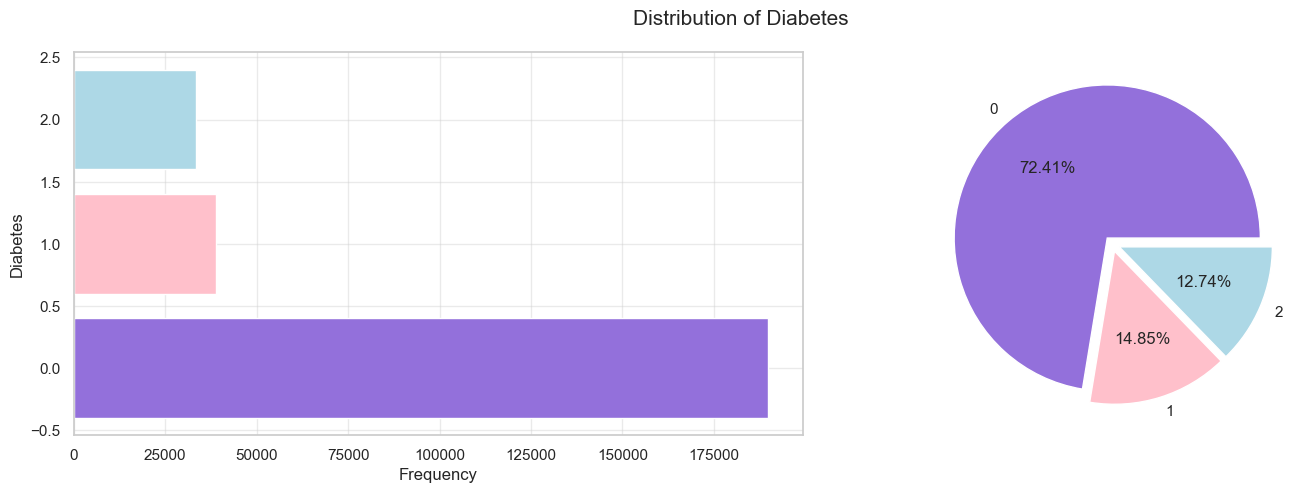

In [ ]:
types = df['Diabetes_012'].value_counts()
colors = ['mediumpurple', 'pink' , "lightblue"]

# Create a two-subplot layout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart on the first subplot
ax1.barh(y=types.index, width=types.values, color=colors)
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Diabetes')
ax1.grid(alpha=0.4)

# Pie chart on the second subplot
ax2.pie(types.values, labels=types.index, explode=([0.05] * len(types.index)), colors=colors, autopct='%.2f%%')

# Configure the overall layout
fig.suptitle('Distribution of Diabetes ', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

### data distribution of each column

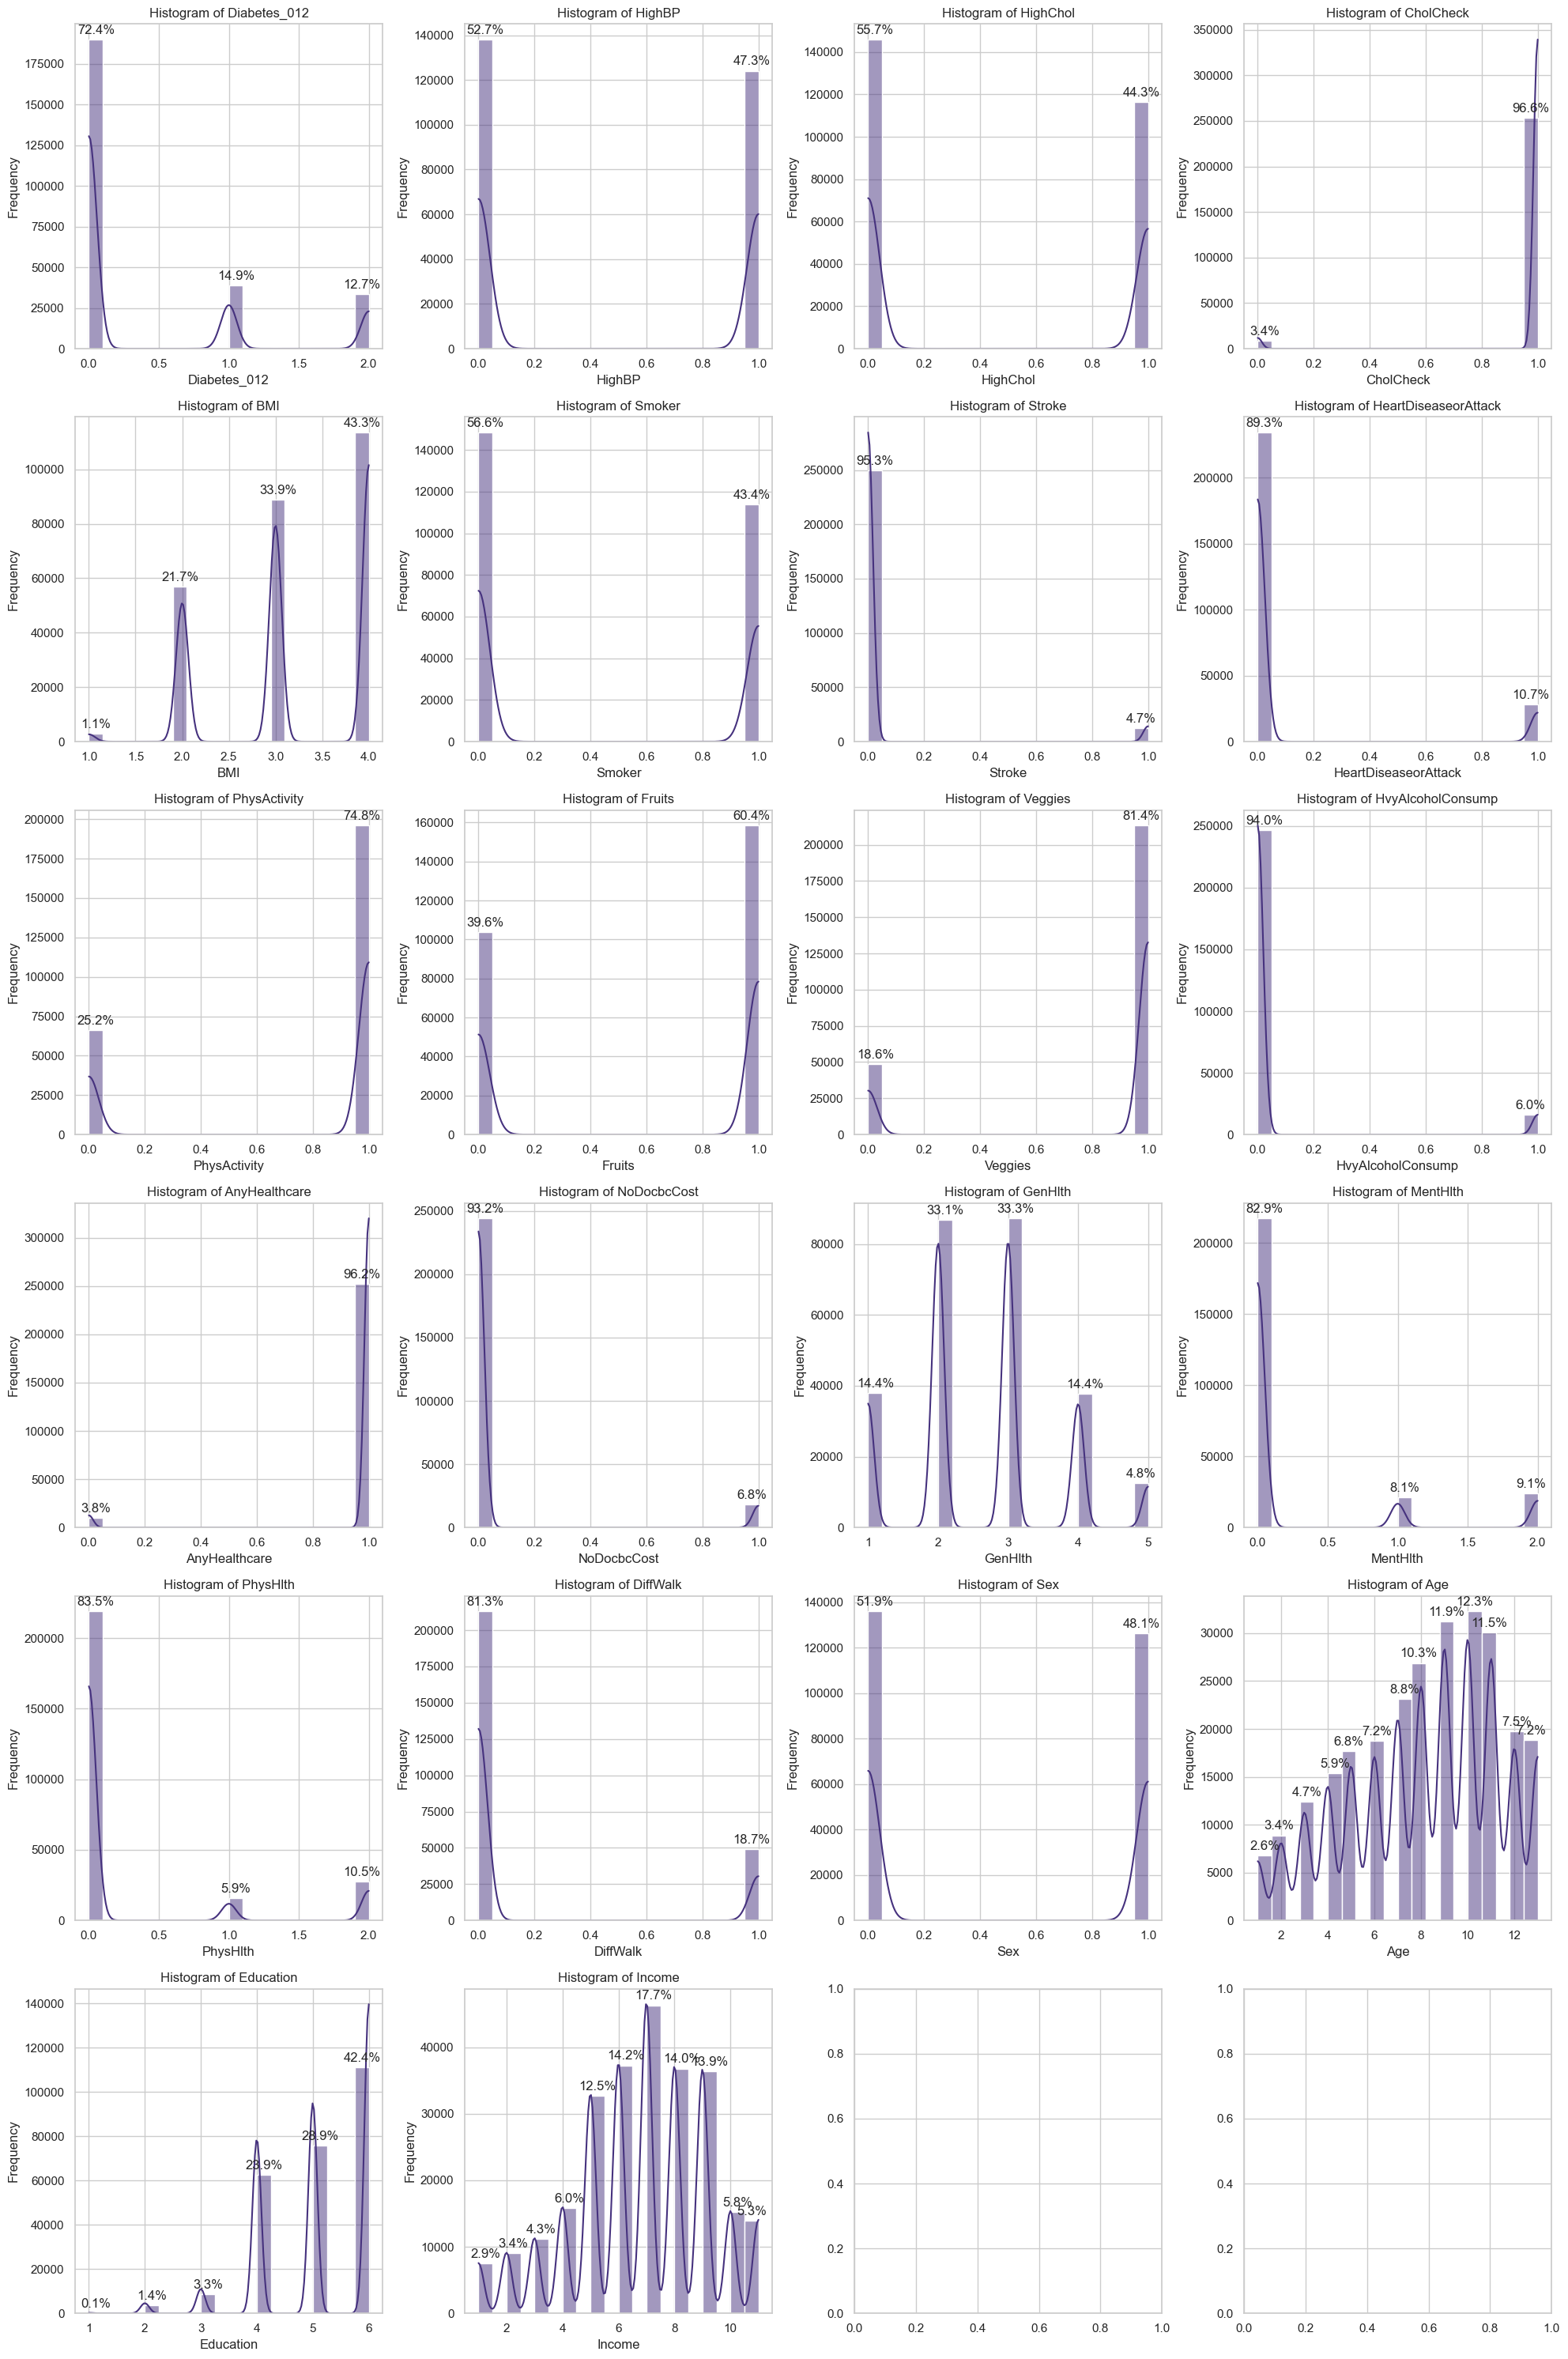

In [ ]:
# Create subplots
fig, axes = plt.subplots(6, 4, figsize=(20, 30))

# Flatten axes for easy iteration
axes = axes.flatten()

# Iterate over each numerical column and create histograms
for i, col in enumerate(df.select_dtypes(include='number').columns):
    # Plot histogram
    sns.histplot(df[col], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

    # Add percentage text to each bin
    total_samples = len(df[col])
    for patch in axes[i].patches:
        height = patch.get_height()
        percentage = (height / total_samples) * 100
        if percentage > 0:  # if percentage is greater than 0
            axes[i].annotate(f'{percentage:.1f}%', xy=(patch.get_x() + patch.get_width() / 2, height), xytext=(0, 3),
                             textcoords="offset points", ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

### Each column Diabetes distribution

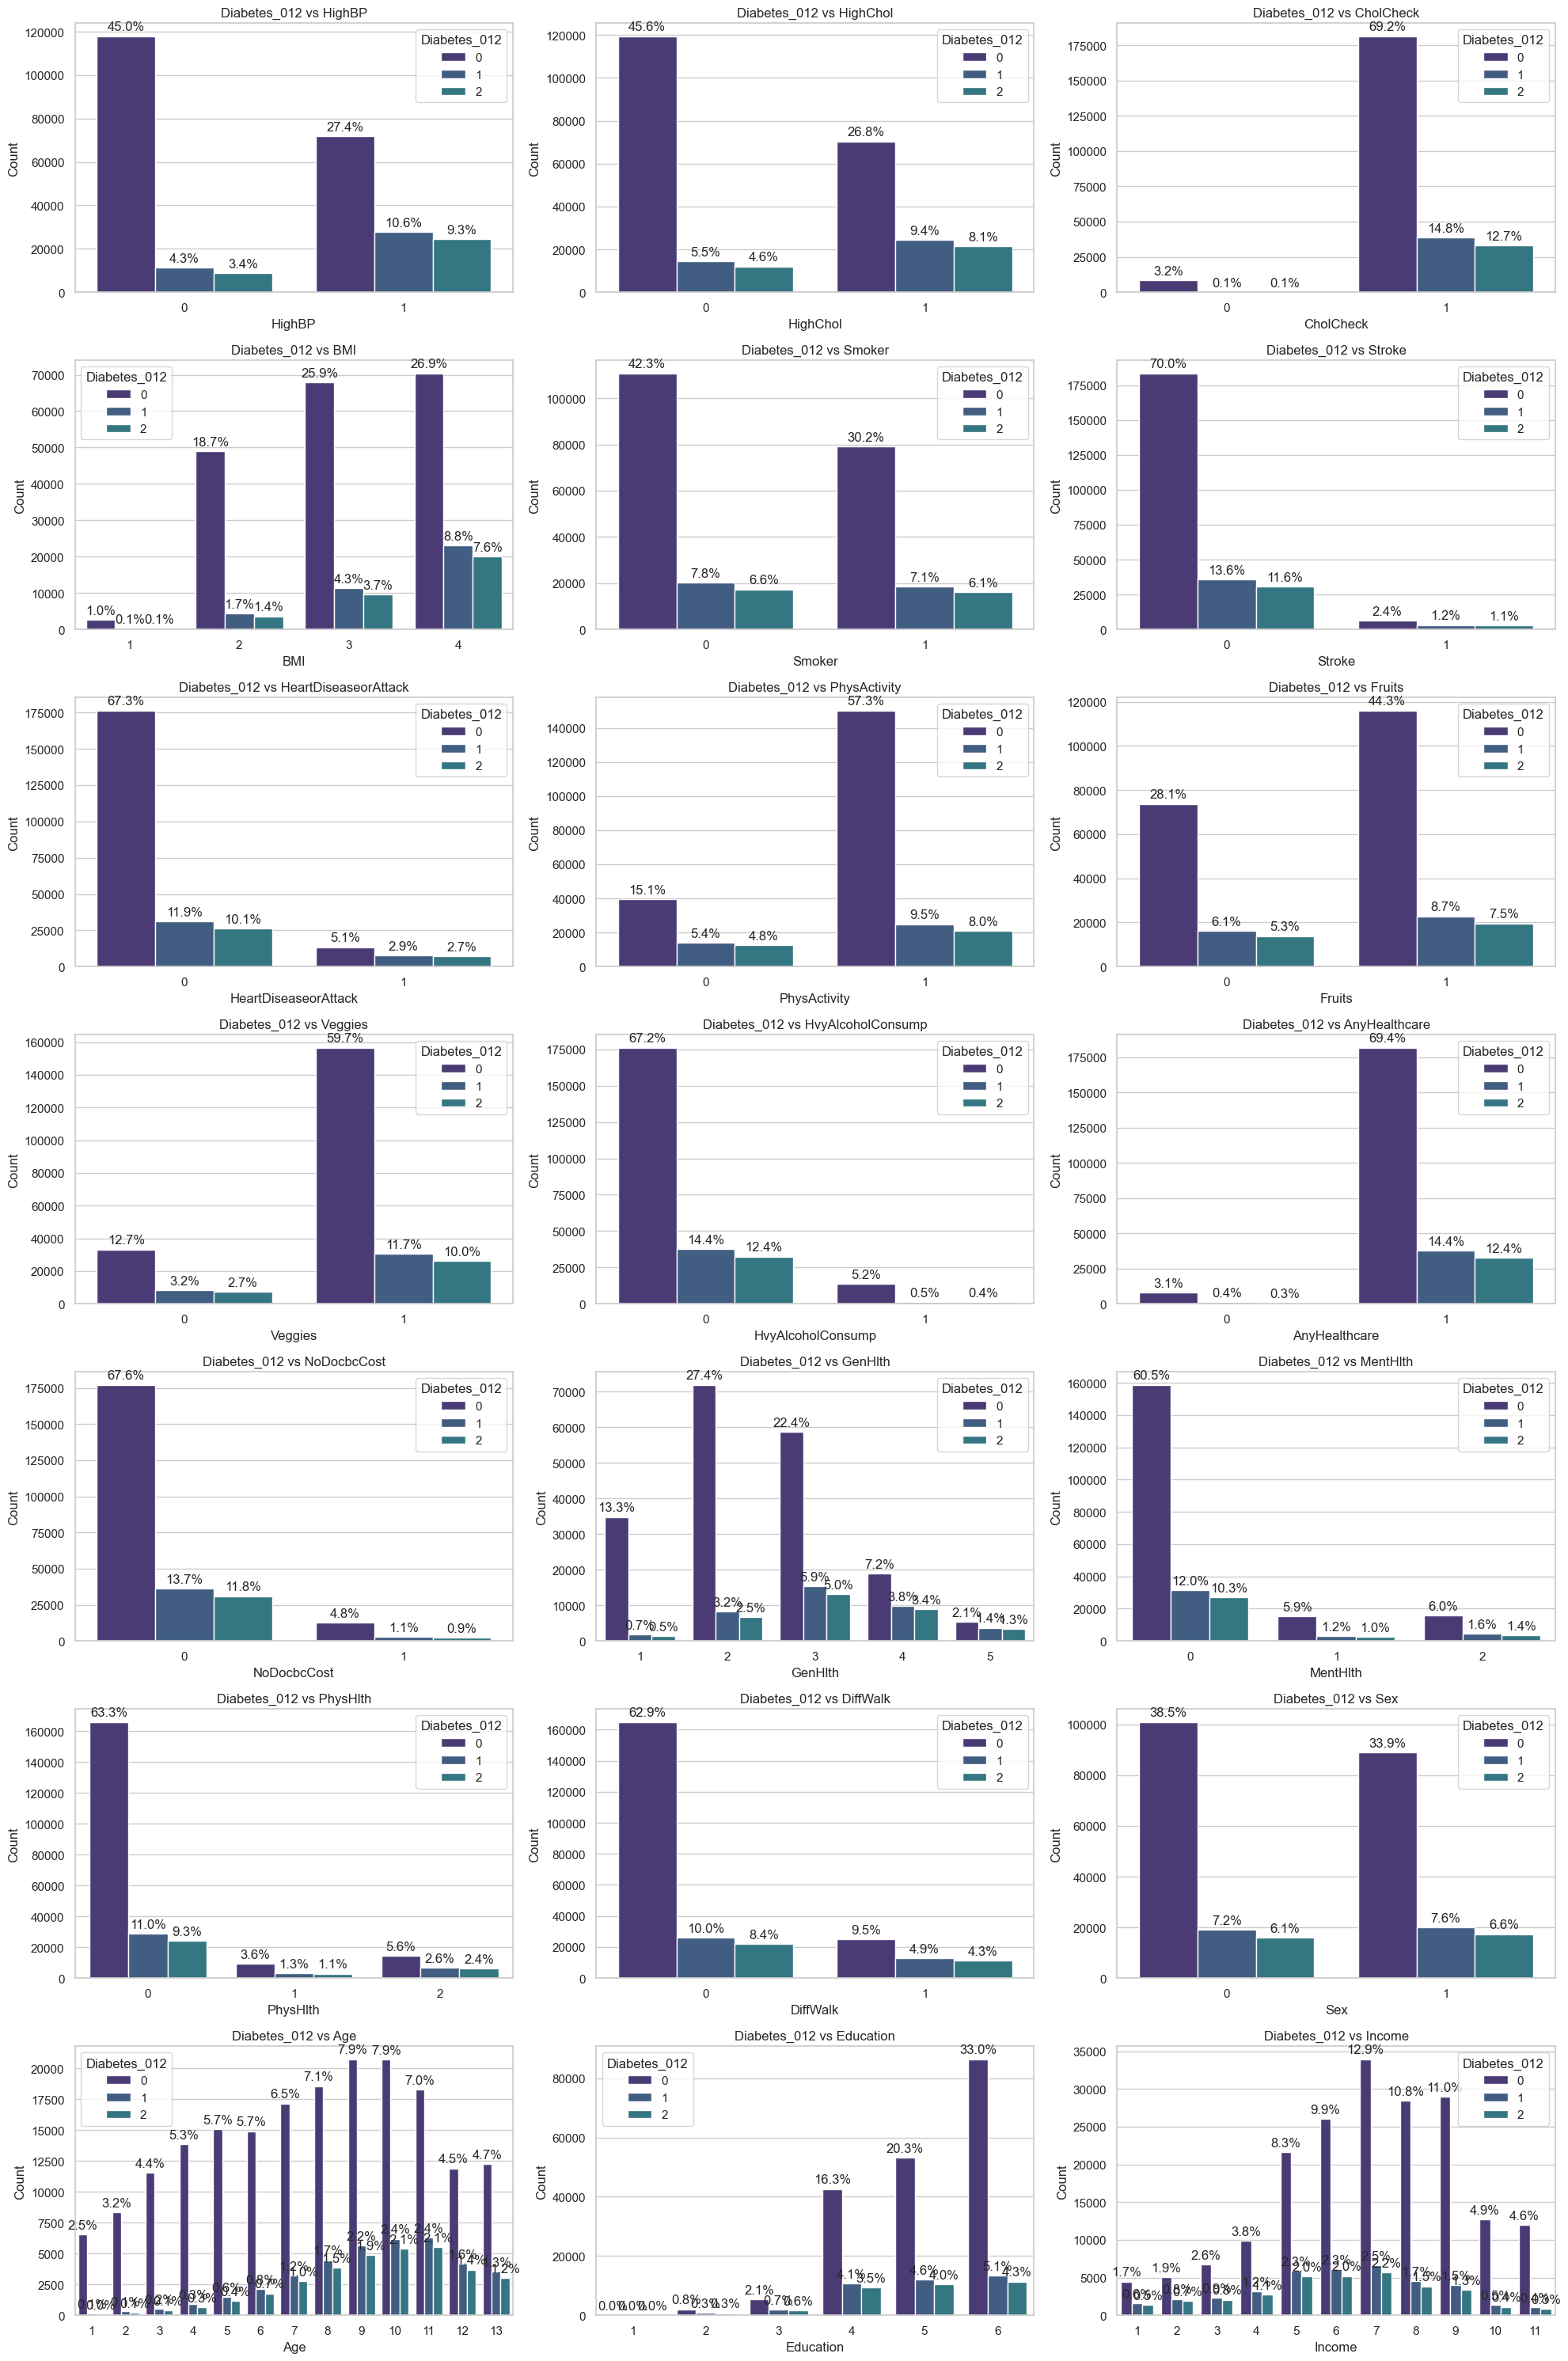

In [ ]:
# Create subplots
fig, axes = plt.subplots(7, 3, figsize=(20, 30))

# Flatten axes for easy iteration
axes = axes.flatten()

# Iterate over each comparison and create bar plots
for i, col in enumerate(df.columns[1:]):  # Exclude the target variable
    sns.countplot(x=col, hue='Diabetes_012', data=df, ax=axes[i])
    axes[i].set_title(f'Diabetes_012 vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

    # Add percentages to each bar
    total_samples = len(df[col])
    for patch in axes[i].patches:
        height = patch.get_height()
        percentage = (height / total_samples) * 100
        axes[i].annotate(f'{percentage:.1f}%', xy=(patch.get_x() + patch.get_width() / 2, height), xytext=(0, 3),
                         textcoords="offset points", ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

##### Each column Diabetes distribution with out absence (0) of diabetes for better uberstanding.

In [ ]:
# Remove rows where Diabetes_012 equals 0
diabetes_df = df[df['Diabetes_012'] != 0]

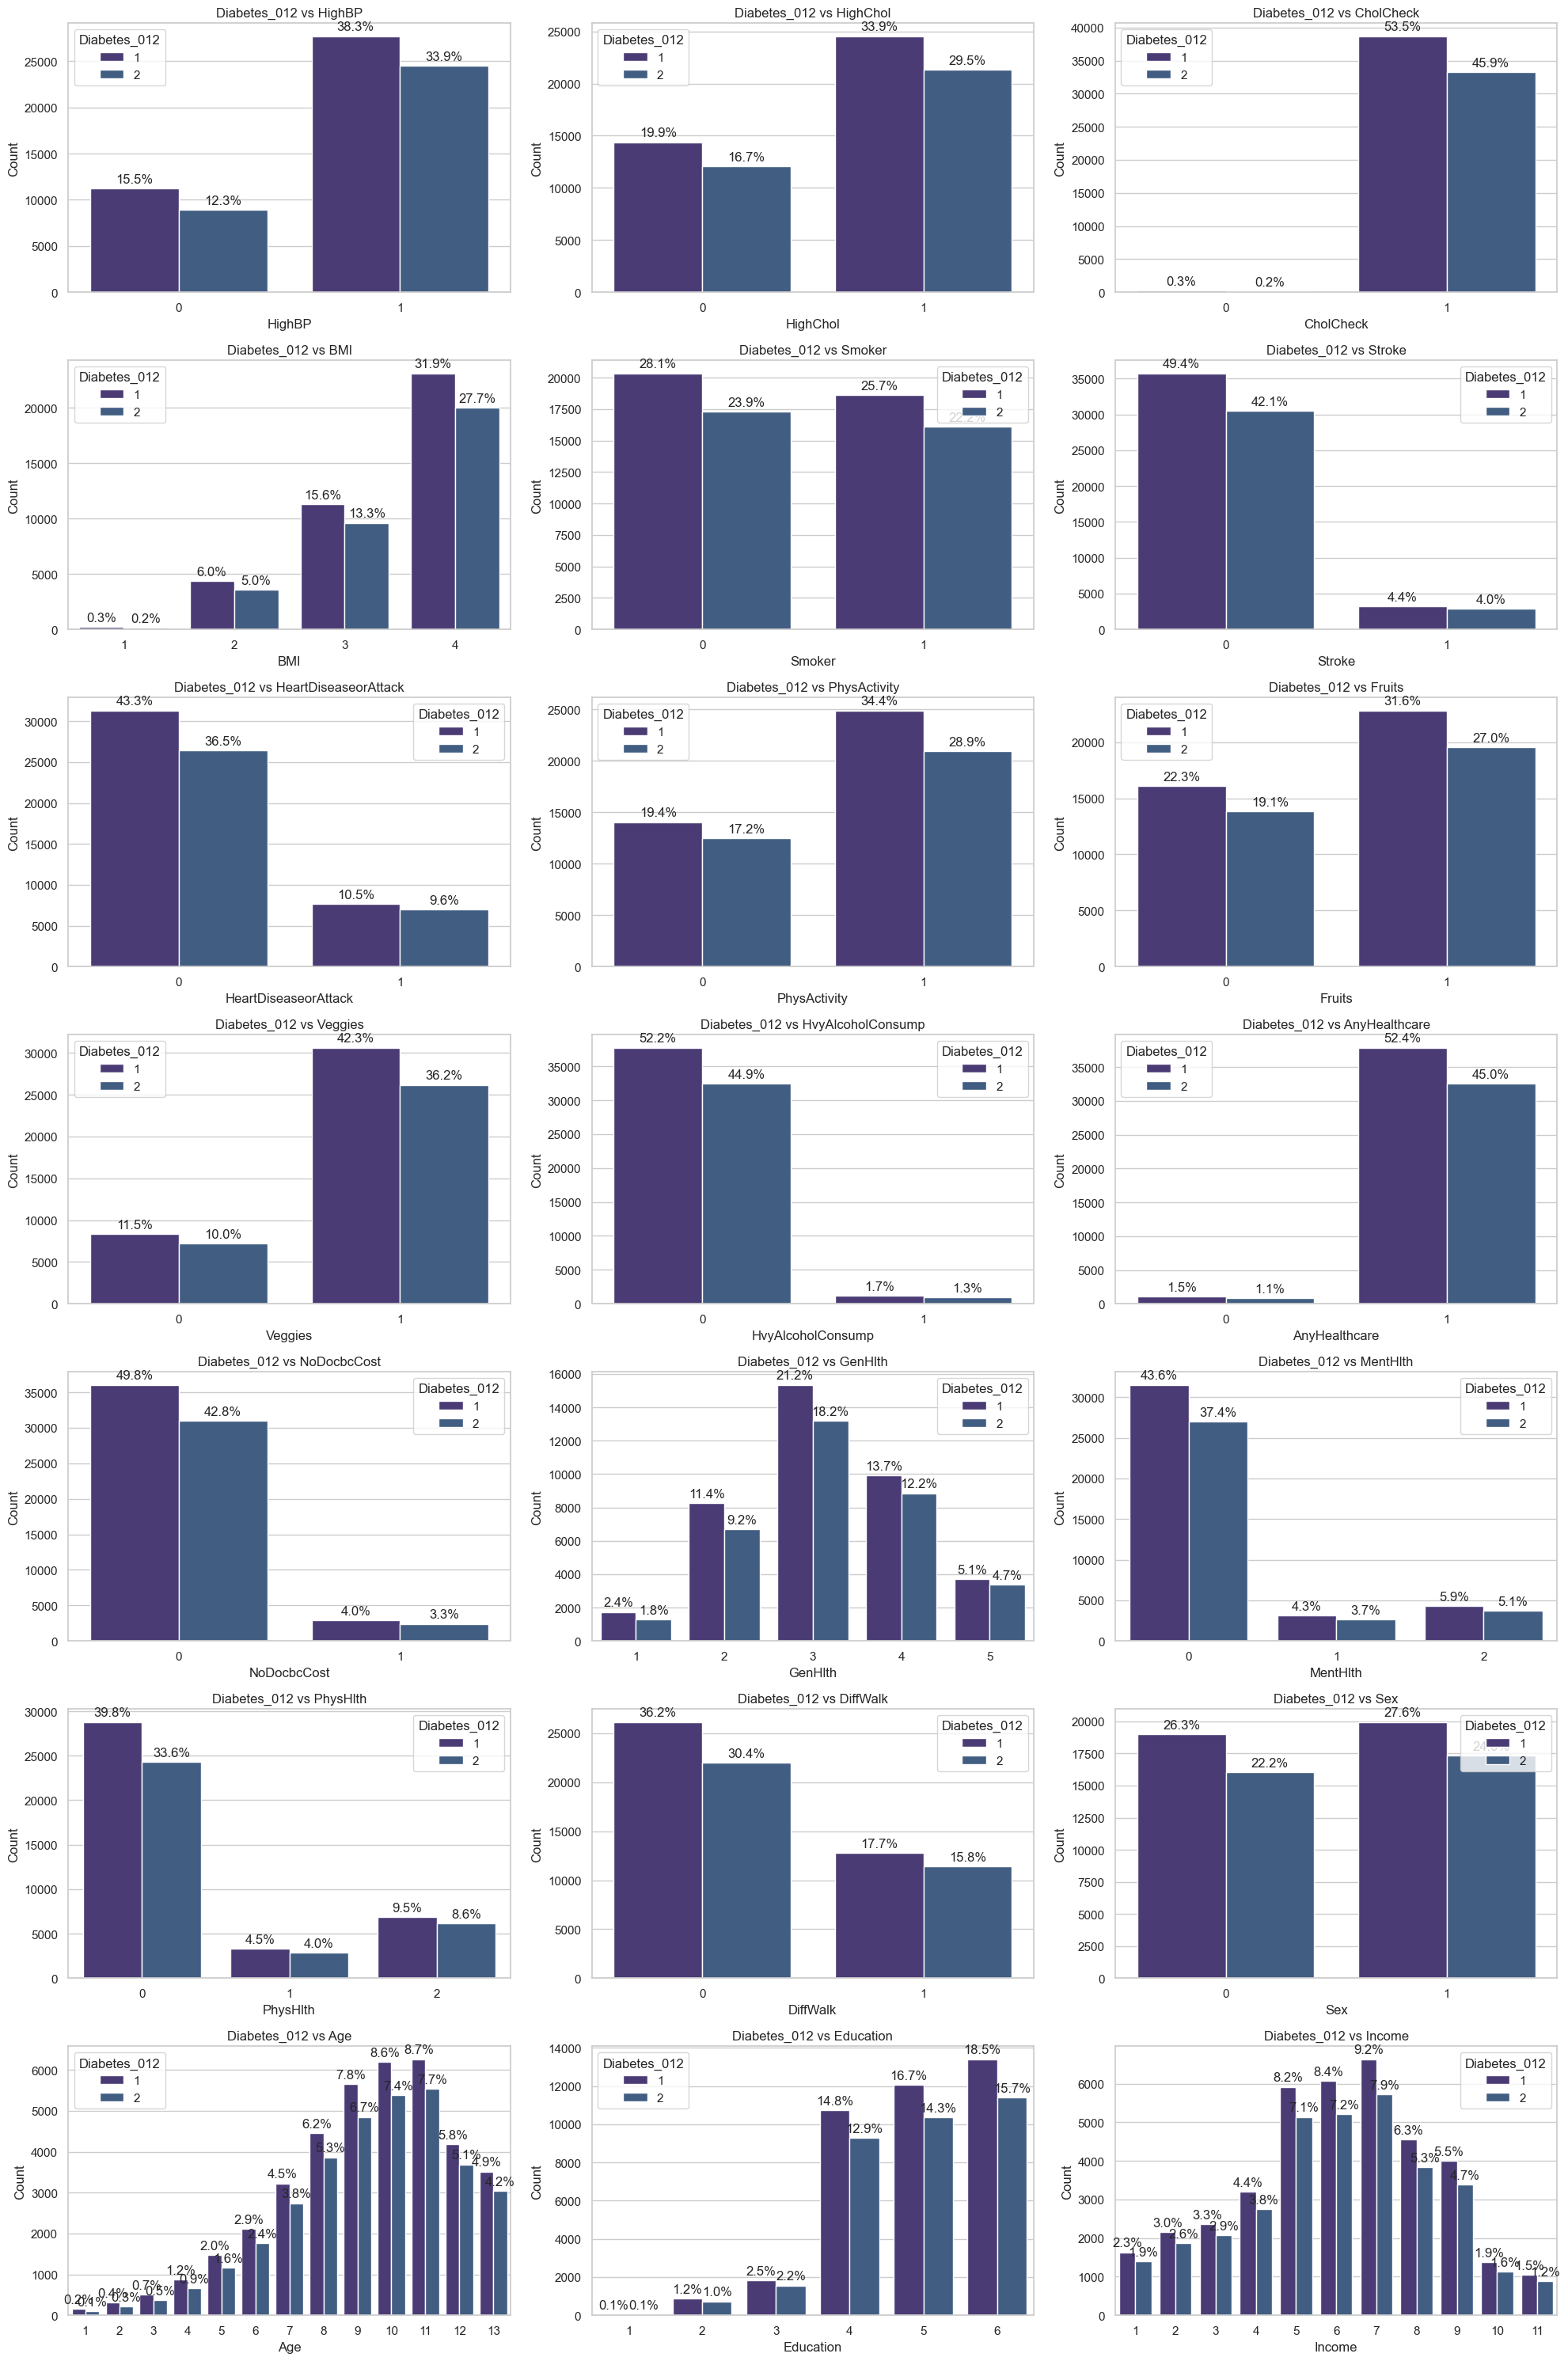

In [ ]:
# Create subplots
fig, axes = plt.subplots(7, 3, figsize=(20, 30))

# Flatten axes for easy iteration
axes = axes.flatten()

# Iterate over each comparison and create bar plots
for i, col in enumerate(diabetes_df.columns[1:]):  # Exclude the target variable
    sns.countplot(x=col, hue='Diabetes_012', data=diabetes_df, ax=axes[i])
    axes[i].set_title(f'Diabetes_012 vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

    # Add percentages to each bar
    total_samples = len(diabetes_df[col])
    for patch in axes[i].patches:
        height = patch.get_height()
        percentage = (height / total_samples) * 100
        axes[i].annotate(f'{percentage:.1f}%', xy=(patch.get_x() + patch.get_width() / 2, height), xytext=(0, 3),
                         textcoords="offset points", ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

### Plot correlation heatmap

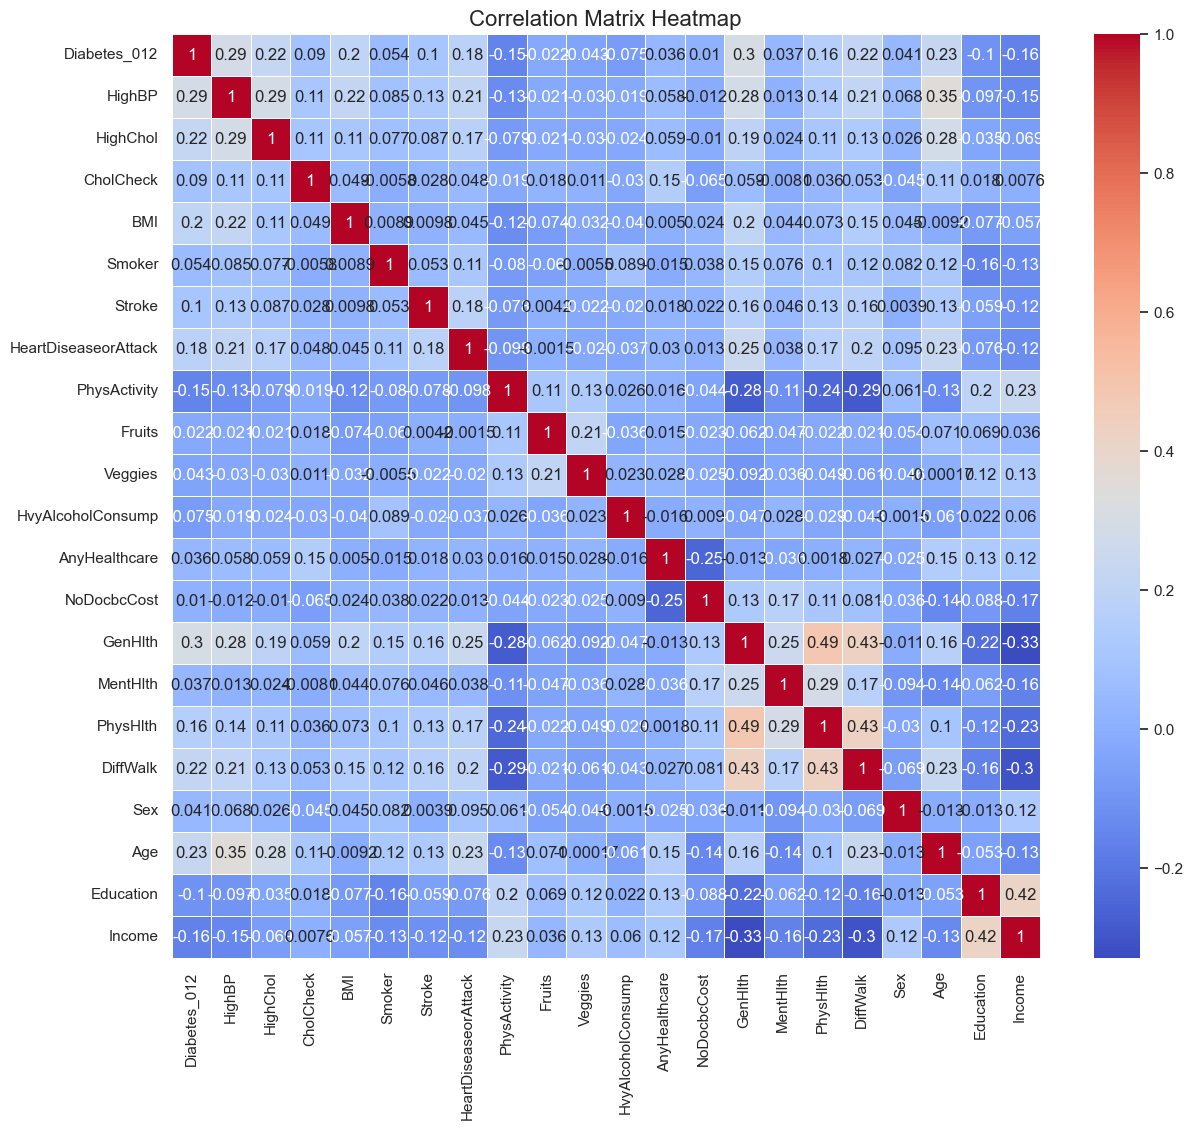

In [ ]:
plt.figure(figsize=(14, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

### correlation to Y (Diabetes_012)

In [ ]:
df.corr()['Diabetes_012'].sort_values(ascending=False)

Diabetes_012            1.000000
GenHlth                 0.302502
HighBP                  0.289654
Age                     0.226696
HighChol                0.221829
DiffWalk                0.219103
BMI                     0.200801
HeartDiseaseorAttack    0.180228
PhysHlth                0.160710
Stroke                  0.103636
CholCheck               0.089885
Smoker                  0.053660
Sex                     0.040999
MentHlth                0.036958
AnyHealthcare           0.036430
NoDocbcCost             0.010052
Fruits                 -0.021571
Veggies                -0.042693
HvyAlcoholConsump      -0.074570
Education              -0.103335
PhysActivity           -0.153722
Income                 -0.160828
Name: Diabetes_012, dtype: float64

In [ ]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing#'] = df.isna().sum()
    summary_df['missing%'] = (df.isna().sum())/len(df)
    summary_df['unique'] = df.nunique().values
    summary_df['duplicated'] = df.duplicated().sum()
    summary_df['count'] = df.count().values
    return summary_df

summary(df).style.background_gradient(cmap='Purples')

,dtypes,missing#,missing%,unique,duplicated,count
Diabetes_012,int8,0,0.000000,3,49553,262187
HighBP,int8,0,0.000000,2,49553,262187
HighChol,int8,0,0.000000,2,49553,262187
CholCheck,int8,0,0.000000,2,49553,262187
BMI,int8,0,0.000000,4,49553,262187
Smoker,int8,0,0.000000,2,49553,262187
Stroke,int8,0,0.000000,2,49553,262187
HeartDiseaseorAttack,int8,0,0.000000,2,49553,262187
PhysActivity,int8,0,0.000000,2,49553,262187
Fruits,int8,0,0.000000,2,49553,262187


### Handling outliers

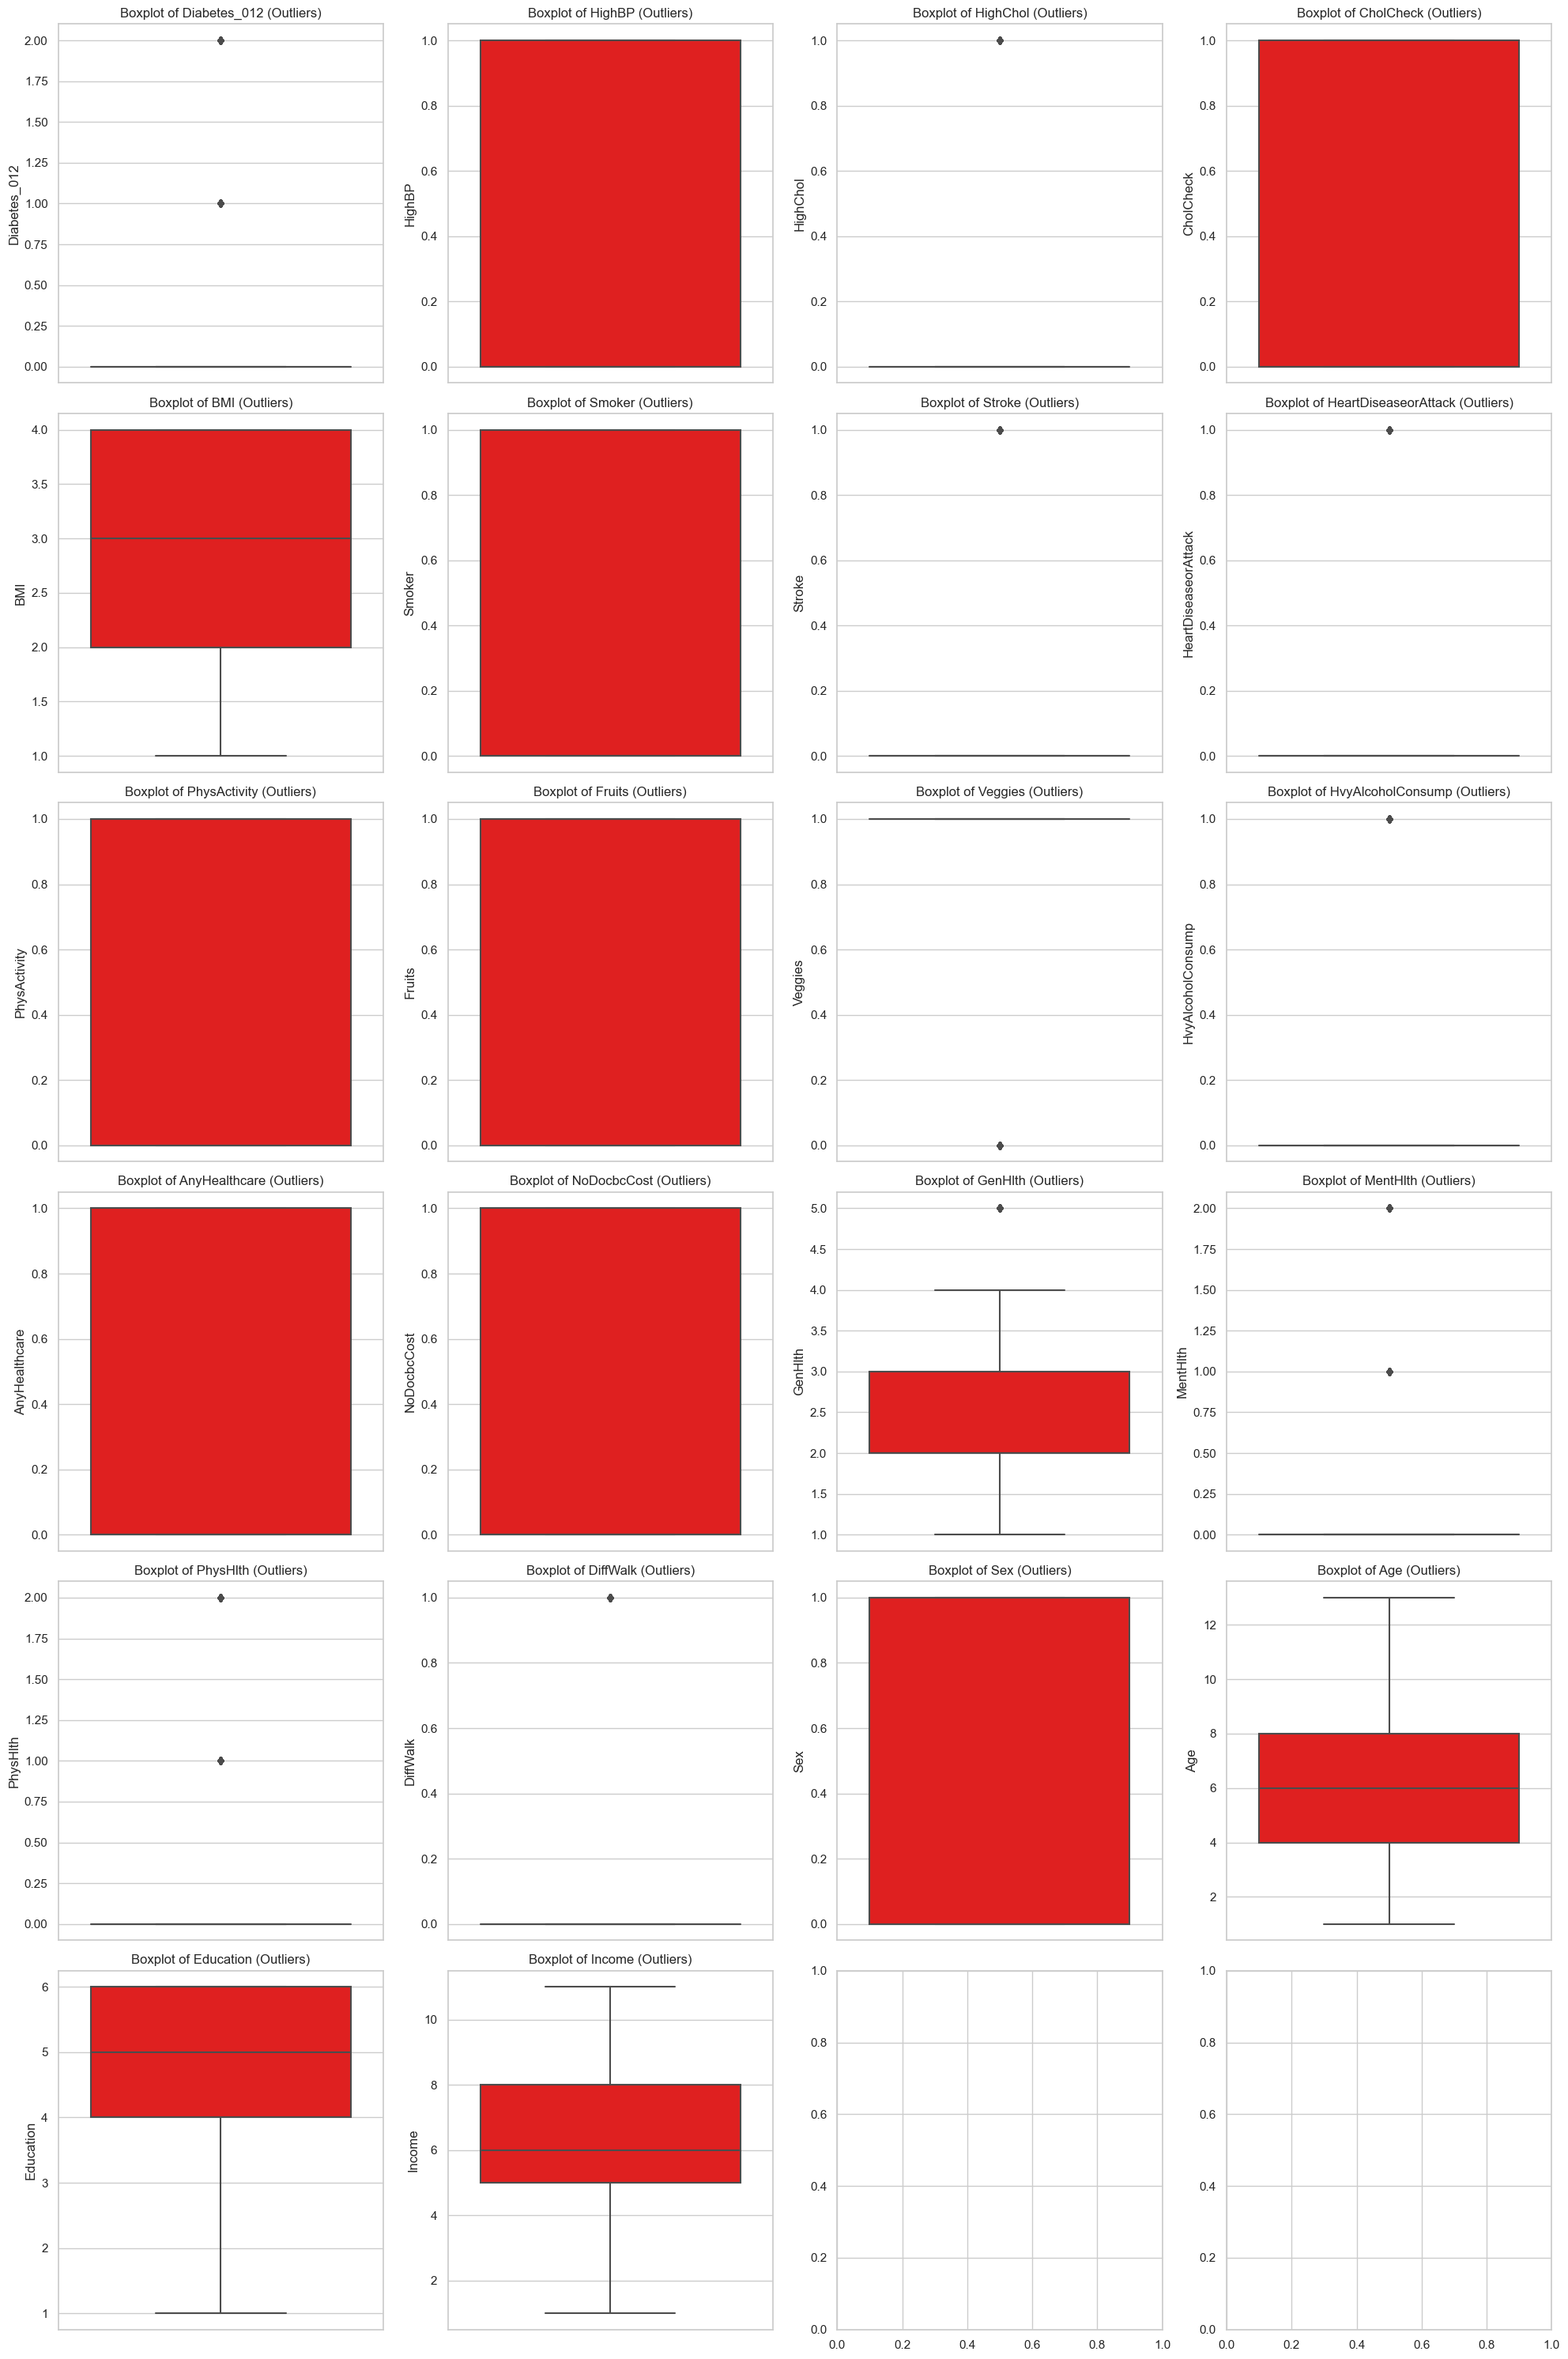

In [ ]:
# Calculate z-scores for numerical columns
z_scores = df.select_dtypes(include='number').apply(zscore)

# Set threshold for outlier detection
threshold = 4.5

# Identify outliers
outlier_indices = ((z_scores > threshold) | (z_scores < -threshold)).any(axis=1)

# Visualize outliers using boxplots
outliers = df[outlier_indices]

# Create subplots
fig, axes = plt.subplots(6, 4, figsize=(20, 30))

# Flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(outliers.select_dtypes(include='number').columns):
    plt.subplot(6, 4, i+1)  # Use 6 rows and 4 columns for subplots
    sns.boxplot(y=outliers[col], color='red')
    plt.title(f'Boxplot of {col} (Outliers)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
# Print the rows containing outliers
print("Rows containing outliers:")
print(outliers)

# Count the number of outlier rows for each column
outlier_counts = outlier_indices.sum()
print("\nNumber of outlier rows:", outlier_counts)

# Remove outliers
#df = df[~outlier_indices]

Rows containing outliers:
        Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
44                 0       0         0          0    3       1       0   
168                0       1         1          1    4       0       0   
183                0       1         1          1    4       1       0   
201                0       1         0          0    4       1       0   
209                0       1         1          0    4       1       0   
...              ...     ...       ...        ...  ...     ...     ...   
472449             1       1         1          1    4       1       1   
472518             1       1         1          1    4       0       0   
472586             0       1         0          1    4       1       0   
472614             1       1         0          1    2       0       0   
472693             1       0         0          1    4       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
44         

### one-hot encode for data set

In [ ]:
# One-hot encode categorical columns except the target variable
df = pd.get_dummies(df, columns=['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
                                          'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
                                          'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
                                          'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income' ])

# Print the first few rows to verify the encoding
print(df.head())

   Diabetes_012  HighBP_0  HighBP_1  HighChol_0  HighChol_1  CholCheck_0  \
0             0         1         0           0           1            0   
1             2         0         1           1           0            0   
2             2         0         1           0           1            0   
3             2         1         0           0           1            0   
4             0         1         0           1           0            0   

   CholCheck_1  BMI_1  BMI_2  BMI_3  ...  Income_2  Income_3  Income_4  \
0            1      1      0      0  ...         0         0         0   
1            1      0      0      1  ...         0         1         0   
2            1      0      0      0  ...         0         0         0   
3            1      0      0      1  ...         0         0         1   
4            1      0      1      0  ...         0         0         0   

   Income_5  Income_6  Income_7  Income_8  Income_9  Income_10  Income_11  
0         1         0 

In [ ]:
df

,Diabetes_012,HighBP_0,HighBP_1,HighChol_0,HighChol_1,CholCheck_0,CholCheck_1,BMI_1,BMI_2,BMI_3,...,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8,Income_9,Income_10,Income_11
0,0,1,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,0,1,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,2,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2,1,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472731,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
472733,1,0,1,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
472740,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
472747,1,0,1,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Separate the target variable (y) from the input features (X)

In [ ]:
X = df.drop(columns=['Diabetes_012'])  # Input features excluding 'Diabetes_012'
y = df['Diabetes_012']  # Target variable

# Display the shapes of X and y to verify the split
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (262187, 73)
Shape of y: (262187,)


In [ ]:
X

,HighBP_0,HighBP_1,HighChol_0,HighChol_1,CholCheck_0,CholCheck_1,BMI_1,BMI_2,BMI_3,BMI_4,...,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8,Income_9,Income_10,Income_11
0,1,0,0,1,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472731,1,0,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
472733,0,1,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
472740,0,1,0,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
472747,0,1,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
y

0         0
1         2
2         2
3         2
4         0
         ..
472731    0
472733    1
472740    1
472747    1
472751    1
Name: Diabetes_012, Length: 262187, dtype: int8

### scale data

### train test split

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### model train

In [ ]:
# Train XGBoost model with all features
model_xgb_db_pred = xgb.XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]  # Define evaluation set for monitoring performance
model_xgb_db_pred.fit(X_train, y_train, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=False)

# Predict on test set
y_pred = model_xgb_db_pred.predict(X_test)

### accuracy

In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
recall = recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
f1 = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7220717800068652
Precision: 0.6133072525648734
Recall: 0.7220717800068652
F1-score: 0.6451424585096991


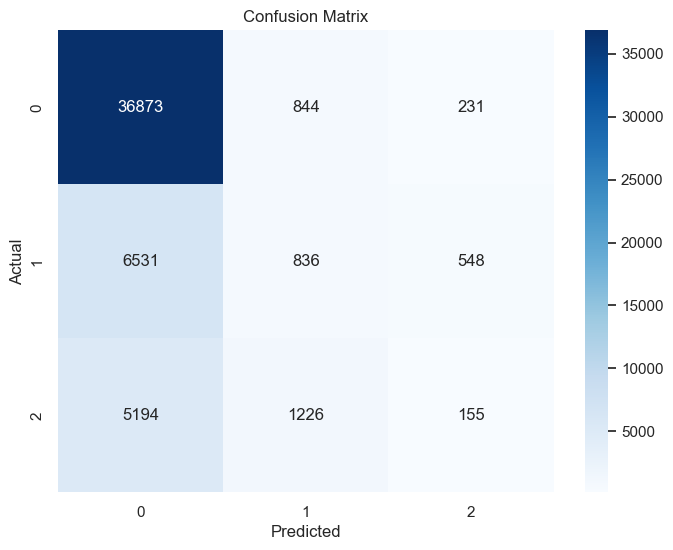

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### checking over fitting or under fitting

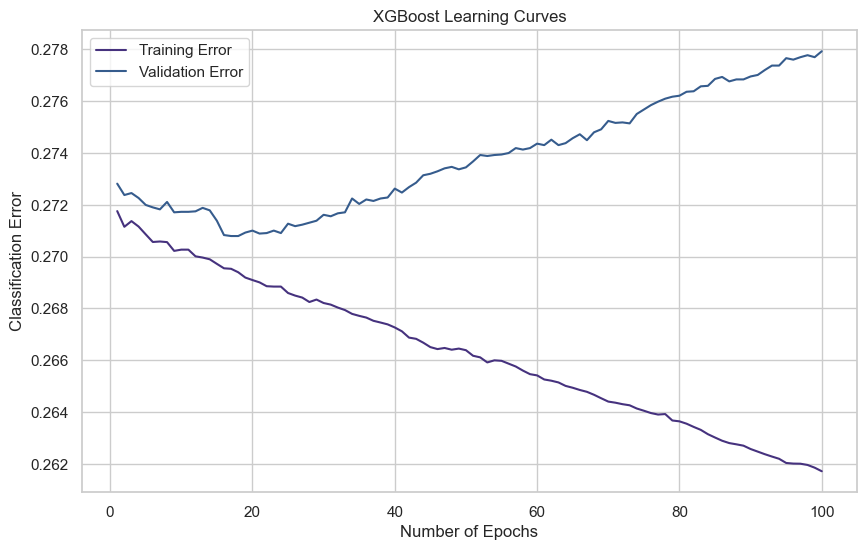

In [ ]:
# Plot learning curves to identify overfitting or underfitting
results = model_xgb_db_pred.evals_result()
epochs = len(results['validation_0']['merror'])  # Get the number of training epochs

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), results['validation_0']['merror'], label='Training Error')
plt.plot(range(1, epochs + 1), results['validation_1']['merror'], label='Validation Error')
plt.xlabel('Number of Epochs')
plt.ylabel('Classification Error')
plt.title('XGBoost Learning Curves')
plt.legend()
plt.show()

### importent features

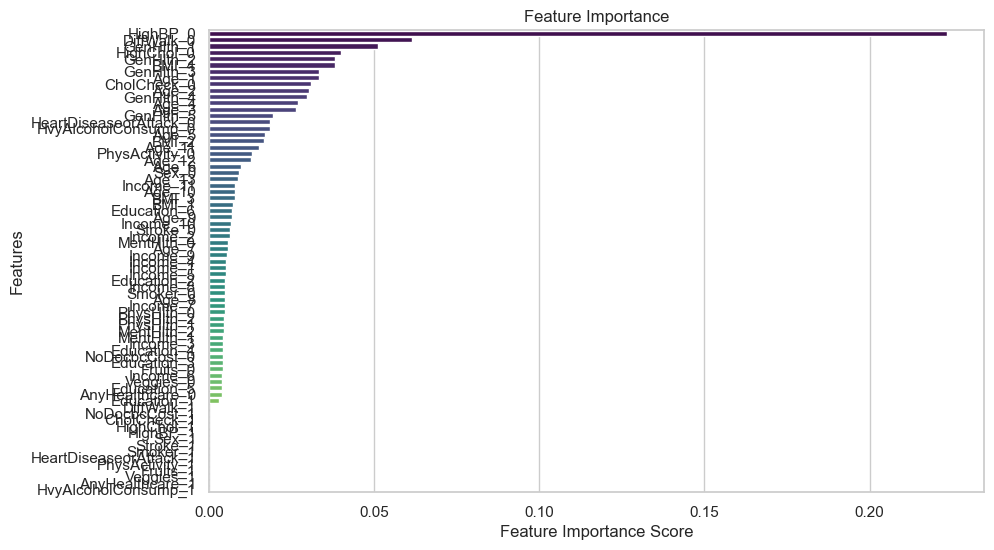

In [ ]:
# Plot feature importance
feature_importance = model_xgb_db_pred.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_idx], y=X_train.columns[sorted_idx], palette='viridis')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

### save the model to pkl file

In [ ]:
# Save the model to a file
joblib.dump(model_xgb_db_pred, 'DB_pre_model.pkl')

# Later, load the model from the file with the following:
#mylog_model = joblib.load('my_model_filename.pkl')

['DB_pre_model.pkl']

In [ ]:
###################